<a href="https://colab.research.google.com/github/HasibAlMuzdadid/Machine-Learning-and-Deep-Learning-Projects/blob/main/happy%20face%20detection%5Bcnn%2Btf%5D/happy_face_detection%5Bcnn%2Btf%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Happy Face Detector**

We'll be using the Happy House dataset which contains images of peoples' faces. Our task will be to build a ConvNet that determines whether the people in the images are smiling or not, because they only get to enter the house if they're smiling!

In [ ]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.layers as tfl

In [ ]:
tf.__version__

'2.8.0'

In [ ]:
def load_happy_dataset():
    train_dataset = h5py.File("train_happy.h5", "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # train set labels

    test_dataset = h5py.File("test_happy.h5", "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [ ]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_happy_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print (f"number of training examples = {X_train.shape[0]}")
print (f"number of test examples = {X_test.shape[0]}")
print (f"X_train shape = {X_train.shape}")
print (f"Y_train shape = {Y_train.shape}")
print (f"X_test shape = {X_test.shape}")
print (f"Y_test shape = {Y_test.shape}")

number of training examples = 600
number of test examples = 150
X_train shape = (600, 64, 64, 3)
Y_train shape = (600, 1)
X_test shape = (150, 64, 64, 3)
Y_test shape = (150, 1)


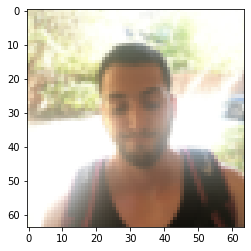

In [ ]:
#display sample training image
index = 124
plt.imshow(X_train_orig[index]) 
plt.show()

Implementing the `happyModel` function below to build the following model: 

`ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE`. 

Also, plugging in the following parameters for all the steps:

 - [ZeroPadding2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/ZeroPadding2D): padding 3, input shape 64 x 64 x 3
 - [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D): Use 32 7x7 filters, stride 1
 - [BatchNormalization](https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization): for axis 3
 - [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/layers/ReLU)
 - [MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D): Using default parameters
 - [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) the previous output.
 - Fully-connected ([Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)) layer: Apply a fully connected layer with 1 neuron and a sigmoid activation. 
 

In [ ]:
def happyModel():
  
  model = tf.keras.Sequential([
                               tf.keras.Input(shape = (64 , 64 ,3)),

                               ## ZeroPadding2D with padding 3, input shape of 64 x 64 x 3
                               tfl.ZeroPadding2D(padding = 3), 

                               ## Conv2D with 32 7x7 filters and stride of 1
                               tfl.Conv2D(filters = 32, kernel_size = 7, strides = 1),

                               ## BatchNormalization for axis 3
                               tfl.BatchNormalization(axis = 3, momentum = 0.99, epsilon = 0.001),

                               ## ReLU
                               tfl.ReLU(),

                               ## Max Pooling 2D with default parameters
                               tfl.MaxPool2D(),

                               ## Flatten layer
                               tfl.Flatten(),

                               ## Dense layer with 1 unit for output & 'sigmoid' activation
                               tfl.Dense(1,activation = "sigmoid")
                        
                               ])
    
  return model

In [ ]:
happy_model = happyModel()

Our model is created, we can compile it for training with an optimizer and loss of our choice. When the string `accuracy` is specified as a metric, the type of accuracy used will be automatically converted based on the loss function used. This is one of the many optimizations built into TensorFlow that make our life easier!

In [ ]:
happy_model.compile(optimizer="adam",
                   loss="binary_crossentropy",
                   metrics=["accuracy"])

In [ ]:
happy_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 70, 70, 3)        0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        4736      
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                        

**Train and Evaluate The Model**

In [ ]:
happy_model.fit(X_train, Y_train, epochs=10, batch_size=16)

Epoch 1/10
38/38 [==============================] - 7s 166ms/step - loss: 1.1152 - accuracy: 0.7250
Epoch 2/10
38/38 [==============================] - 8s 212ms/step - loss: 0.2516 - accuracy: 0.9000
Epoch 3/10
38/38 [==============================] - 4s 105ms/step - loss: 0.2812 - accuracy: 0.8933
Epoch 4/10
38/38 [==============================] - 4s 105ms/step - loss: 0.1181 - accuracy: 0.9467
Epoch 5/10
38/38 [==============================] - 4s 105ms/step - loss: 0.1218 - accuracy: 0.9517
Epoch 6/10
38/38 [==============================] - 4s 104ms/step - loss: 0.1558 - accuracy: 0.9433
Epoch 7/10
38/38 [==============================] - 4s 104ms/step - loss: 0.0895 - accuracy: 0.9717
Epoch 8/10
38/38 [==============================] - 4s 105ms/step - loss: 0.0660 - accuracy: 0.9817
Epoch 9/10
38/38 [==============================] - 4s 104ms/step - loss: 0.0732 - accuracy: 0.9733
Epoch 10/10
38/38 [==============================] - 4s 103ms/step - loss: 0.0938 - accuracy: 0.9600

Using `.evaluate()` to evaluate against our test set. This function will print the value of the loss function and the performance metrics specified during the compilation of the model. In this case, the `binary_crossentropy` and the `accuracy` respectively.

In [ ]:
happy_model.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 55ms/step - loss: 0.1148 - accuracy: 0.9533


[0.1147533655166626, 0.95333331823349]